# 2. Preparation of the dataset for the CNN

# 2.1 Modules & Packages importation

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
from imblearn.over_sampling import RandomOverSampler

import src

# 2.2 Data balancing

In [3]:
#To avoid bias in network training, the random oversampling method is used.

<AxesSubplot:title={'center':'Resampled training set'}, ylabel='Examples'>

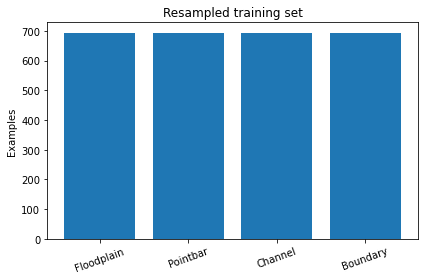

In [2]:
filename = 'data/interim/stanford6_truncated_rgb.h5'
with h5py.File(filename, 'r') as dataset:
    x_train_original = np.array(dataset['train/X'])
    y_train_original = np.array(dataset['train/Y'])
    x_test_original = np.array(dataset['test/X'])
    y_test_original = np.array(dataset['test/Y'])
    
classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}        

m = x_train_original.shape[0]
num_classes = 4

resampler = RandomOverSampler()

x_train_resampled, y_train_resampled = resampler.fit_resample(
    np.reshape(x_train_original, (m, np.product(x_train_original.shape[1:]))), 
    y_train_original
)
x_train_resampled = np.reshape(
    x_train_resampled, 
    (x_train_resampled.shape[0], *x_train_original.shape[1:])
)

src.plot_classes_freq(
    src.class_frequency(y_train_resampled, num_classes),
    classnames.values(),
    title='Resampled training set'
)

# 2.3 Separation of training set and validation

In [4]:
#20% of the training examples is being separated to be used during the validation stage, creating two distinct sets.
#This is another method to improve our check for overfitting adressed in stage 3

<AxesSubplot:title={'center':'Final validation set'}, ylabel='Examples'>

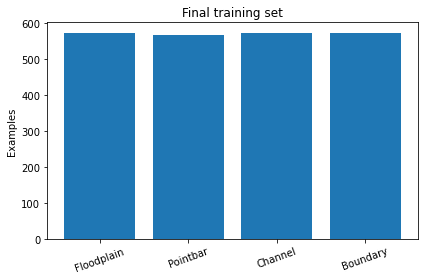

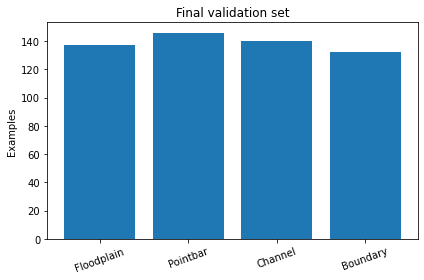

In [3]:
np.random.seed(42)

m = x_train_resampled.shape[0]
idx = np.random.choice(m, int(m * 0.2))
mask = np.ones(m, dtype=bool)
mask[idx] = False

x_train_split, x_val_split = x_train_resampled[mask], x_train_resampled[idx]
y_train_split, y_val_split = y_train_resampled[mask], y_train_resampled[idx]


src.plot_classes_freq(
    src.class_frequency(y_train_split, num_classes),
    classnames.values(),
    title='Final training set'
)

src.plot_classes_freq(
    src.class_frequency(y_val_split, num_classes),
    classnames.values(),
    title='Final validation set'
)

# 2.4 Data extraction for Network Training

In [7]:
x_train = x_train_split.astype('float16') / 255
y_train = keras.utils.to_categorical(y_train_split, num_classes)

x_val = x_val_split.astype('float16') / 255
y_val= keras.utils.to_categorical(y_val_split, num_classes)

x_test = x_test_original.astype('float16') / 255
y_test = keras.utils.to_categorical(y_test_original, num_classes)

out_filename = 'data/processed/stanford6.h5'

with h5py.File(out_filename, 'w') as file:
    file.create_dataset('test/X', data=x_test)
    file.create_dataset('test/Y', data=y_test)
    
    file.create_dataset('val/X', data=x_val)
    file.create_dataset('val/Y', data=y_val)
    
    file.create_dataset('train/X', data=x_train)
    file.create_dataset('train/Y', data=y_train)
